In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
data=pd.read_csv('20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv/Bix_Sent.csv')
data.head()

,flags,utterance,category,intent,Sentiment
0,BM,I have problems with canceling an order,ORDER,cancel_order,NEGATIVE
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,NEGATIVE
2,B,I need help with canceling the last order,ORDER,cancel_order,NEGATIVE
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,NEGATIVE
4,B,problem with cancelling an order I made,ORDER,cancel_order,NEGATIVE


In [3]:
data[]

SyntaxError: invalid syntax (3043779595.py, line 1)

In [4]:
data.shape

(8359, 5)

In [5]:
data2=pd.read_csv('CNN2/flipkart.csv')
data2.head()


,Rate,Review,Summary,Sentiment
0,4,pretty good,awsm,positive
1,5,simply awesome,nice product and hd picture,positive
2,5,worth every penny,super,positive
3,4,pretty good,good product nice price i,positive
4,5,terrific,good,positive


In [6]:

data2.shape

(100000, 4)

In [7]:
data2.Sentiment.value_counts()
# train.intent.value_counts(normalize=True)

positive    81693
negative    13492
neutral      4815
Name: Sentiment, dtype: int64

In [8]:
i = data2[(data2.Sentiment == 'neutral')].index

In [9]:
data2=data2.drop(i)

In [10]:
data2.Sentiment.value_counts()

positive    81693
negative    13492
Name: Sentiment, dtype: int64

In [11]:
data2.shape

(95185, 4)

In [12]:
data2['utterance'] = data2['Review']


concate_data = pd.concat([data,data2])
concate_data.head()

,flags,utterance,category,intent,Sentiment,Rate,Review,Summary
0,BM,I have problems with canceling an order,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
2,B,I need help with canceling the last order,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
4,B,problem with cancelling an order I made,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN


In [13]:
concate_data.shape

data=concate_data
#data=data2
data['Sentiment'] = data['Sentiment'].str.upper()
  
data.head()

,flags,utterance,category,intent,Sentiment,Rate,Review,Summary
0,BM,I have problems with canceling an order,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
1,BIM,how can I find information about canceling ord...,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
2,B,I need help with canceling the last order,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
3,BIP,could you help me cancelling the last order I ...,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN
4,B,problem with cancelling an order I made,ORDER,cancel_order,NEGATIVE,NaN,NaN,NaN


In [14]:
data.shape


(103544, 8)

In [15]:
data.Sentiment.value_counts()

POSITIVE    82118
NEGATIVE    14825
NEUTRAL      6601
Name: Sentiment, dtype: int64

In [14]:
# Missing values
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.style.background_gradient(cmap='seismic')

,Total,Percent
flags,95185,91.927103
category,95185,91.927103
intent,95185,91.927103
Rate,8359,8.072897
Review,8359,8.072897
Summary,8359,8.072897
utterance,0,0.000000
Sentiment,0,0.000000


In [15]:
data.Sentiment.value_counts()
# train.intent.value_counts(normalize=True)

y=data['Sentiment']
x=data.drop('Sentiment',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

#y_test=test['intent']
#x_test=test.drop('intent',axis=1)






,flags,utterance,category,intent,Rate,Review,Summary
34517,NaN,delightful,NaN,NaN,4,delightful,sound quality is awesome
4240,NaN,could be way better,NaN,NaN,2,could be way better,not good air not pass
62382,NaN,good quality product,NaN,NaN,4,good quality product,low budget bt best of d best product
50532,NaN,must buy!,NaN,NaN,5,must buy!,its amazing and good product thank you
18292,NaN,perfect product!,NaN,NaN,5,perfect product!,no any issue perfectly working superfast cooling


In [16]:
x_test.head()

,flags,utterance,category,intent,Rate,Review,Summary
44799,NaN,simply awesome,NaN,NaN,5,simply awesome,excellent product
28960,NaN,expected a better product,NaN,NaN,2,expected a better product,damaged product
57327,NaN,worth every penny,NaN,NaN,5,worth every penny,fridge is great working well and thanks flipkart
15885,NaN,not specified,NaN,NaN,5,not specified,very nice
5306,NaN,wonderful,NaN,NaN,4,wonderful,great shine on utensils


In [17]:
x_train.shape


x_test.shape

y_train.shape

print(y_train.nunique())
print(y_test.nunique())

3
3


In [18]:
import nltk
nltk.download('stopwords')
words = set(stopwords.words("english"))

count = 0
for elem in iter(words):
    count = count + 1
    if count == 20:
        break
    print (elem)

x_train['text'] = x_train['utterance'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))
x_test['text'] = x_test['utterance'].apply(lambda x: ' '.join([word for word in x.split() if word not in (words)]))

x_train['text'] = x_train['text'].str.replace('\d+', '')
x_test['text'] = x_test['text'].str.replace('\d+', '')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app


theirs
same
or
where
each
only
don't
those
not
no
own
o
shan't
d
you'd
you're
into
again
ain


C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [19]:


#from sklearn import preprocessing
#lll=test_labels
#train_le = preprocessing.LabelEncoder()
#train_le.fit(lll)

#lll = train_le.transform(lll)
#label_dict = dict(zip(list(train_le.classes_), train_le.transform(list(train_le.classes_))))
#k=train_le.classes
#print(k)
#print(label_dict)
#print(lll)






x_train



,flags,utterance,category,intent,Rate,Review,Summary,text
34517,NaN,delightful,NaN,NaN,4,delightful,sound quality is awesome,delightful
4240,NaN,could be way better,NaN,NaN,2,could be way better,not good air not pass,could way better
62382,NaN,good quality product,NaN,NaN,4,good quality product,low budget bt best of d best product,good quality product
50532,NaN,must buy!,NaN,NaN,5,must buy!,its amazing and good product thank you,must buy!
18292,NaN,perfect product!,NaN,NaN,5,perfect product!,no any issue perfectly working superfast cooling,perfect product!
...,...,...,...,...,...,...,...,...
7095,BL,assistance using my new user account,ACCOUNT,switch_account,NaN,NaN,NaN,assistance using new user account
4360,BL,making claim against your company,FEEDBACK,complaint,NaN,NaN,NaN,making claim company
84439,NaN,simply awesome,NaN,NaN,5,simply awesome,smart watch,simply awesome
72849,NaN,value-for-money,NaN,NaN,4,value-for-money,good,value-for-money


In [20]:
x_test



,flags,utterance,category,intent,Rate,Review,Summary,text
44799,NaN,simply awesome,NaN,NaN,5,simply awesome,excellent product,simply awesome
28960,NaN,expected a better product,NaN,NaN,2,expected a better product,damaged product,expected better product
57327,NaN,worth every penny,NaN,NaN,5,worth every penny,fridge is great working well and thanks flipkart,worth every penny
15885,NaN,not specified,NaN,NaN,5,not specified,very nice,specified
5306,NaN,wonderful,NaN,NaN,4,wonderful,great shine on utensils,wonderful
...,...,...,...,...,...,...,...,...
41842,NaN,best in the market!,NaN,NaN,5,best in the market!,very happy,best market!
56896,NaN,worth the money,NaN,NaN,4,worth the money,every thing is good but bottle leak when bottl...,worth money
48354,NaN,brilliant,NaN,NaN,5,brilliant,good product,brilliant
10219,NaN,brilliant,NaN,NaN,5,brilliant,good,brilliant


In [21]:
labels=y_train
test_labels=y_test

text = x_train['text']
test_text = x_test['text']


labels.nunique()



3

In [22]:
cl = test_labels.unique().tolist()
print(cl)



['POSITIVE', 'NEGATIVE', 'NEUTRAL']


In [23]:
classes = data.Sentiment.unique().tolist()
classes

['NEGATIVE', 'NEUTRAL', 'POSITIVE']

In [24]:
print(test_labels)

44799    POSITIVE
28960    NEGATIVE
57327    POSITIVE
15885    POSITIVE
5306     POSITIVE
           ...   
41842    POSITIVE
56896    NEGATIVE
48354    POSITIVE
10219    POSITIVE
40279    POSITIVE
Name: Sentiment, Length: 20709, dtype: object


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer()
tok.fit_on_texts(text)
word_index = tok.word_index

word_index


{'product': 1,
 'good': 2,
 'awesome': 3,
 'purchase': 4,
 'terrific': 5,
 'i': 6,
 'money': 7,
 'worth': 8,
 'wonderful': 9,
 'nice': 10,
 'specified': 11,
 'recommended': 12,
 'buy': 13,
 'every': 14,
 'penny': 15,
 'best': 16,
 'super': 17,
 'classy': 18,
 'great': 19,
 'excellent': 20,
 'perfect': 21,
 'market': 22,
 'brilliant': 23,
 'must': 24,
 'fabulous': 25,
 'simply': 26,
 'mind': 27,
 'blowing': 28,
 'highly': 29,
 'wow': 30,
 'quality': 31,
 'help': 32,
 'delightful': 33,
 'really': 34,
 'choice': 35,
 'pretty': 36,
 'value': 37,
 'for': 38,
 'waste': 39,
 'check': 40,
 'could': 41,
 'disappointed': 42,
 'need': 43,
 'know': 44,
 'decent': 45,
 'fair': 46,
 'job': 47,
 'assistance': 48,
 'account': 49,
 'order': 50,
 'okay': 51,
 'want': 52,
 'better': 53,
 'terrible': 54,
 'rubbish': 55,
 'absolute': 56,
 'utterly': 57,
 'worthless': 58,
 'it': 59,
 'worst': 60,
 'experience': 61,
 'ever': 62,
 'expectations': 63,
 'poor': 64,
 'meet': 65,
 'useless': 66,
 'hated': 67,
 'a

In [26]:
import pickle
with open('CNN2/text_sen_15.pickle', 'wb') as handle:
    pickle.dump(text, handle,protocol=pickle.HIGHEST_PROTOCOL)


In [26]:
def max_length(words):
  return(len(max(words, key = len)))
input_length = max_length(word_index)
input_length

18

In [27]:

max_vocab_size = len(word_index) + 1


with open('CNN2/word_sen_15.pickle', 'wb') as handle:
    pickle.dump(word_index, handle,protocol=pickle.HIGHEST_PROTOCOL)



max_vocab_size

1328

In [28]:

train_data_tokens = tok.texts_to_sequences(text)
test_data_tokens = tok.texts_to_sequences(test_text)

train_data_tokens

[[33],
 [41, 84, 53],
 [2, 31, 1],
 [24, 13],
 [21, 1],
 [2, 35],
 [6, 113, 40, 155, 6, 138, 74],
 [11],
 [18, 1],
 [24, 13],
 [47],
 [6, 44, 157, 124, 93],
 [11],
 [195, 82, 71],
 [30],
 [2, 31, 1],
 [23],
 [5, 4],
 [24, 13],
 [6, 44, 6, 40, 87],
 [47],
 [9],
 [11],
 [11],
 [32, 252, 95, 86, 142],
 [3],
 [9],
 [11],
 [26, 3],
 [33],
 [23],
 [9],
 [10],
 [2],
 [2, 31, 1],
 [2, 31, 1],
 [70],
 [2, 31, 1],
 [682, 683, 525, 526, 525, 684],
 [100, 107, 13, 89],
 [20],
 [30],
 [21, 1],
 [8, 7],
 [24, 13],
 [47],
 [10],
 [26, 3],
 [5],
 [9],
 [30],
 [160, 685, 86, 142],
 [21, 1],
 [25],
 [33],
 [17],
 [27, 28, 4],
 [5],
 [5],
 [25],
 [5, 4],
 [26, 3],
 [26, 3],
 [16, 22],
 [29, 12],
 [8, 14, 15],
 [27, 28, 4],
 [21, 1],
 [2, 31, 1],
 [26, 3],
 [2],
 [27, 28, 4],
 [19, 1],
 [2, 31, 1],
 [18, 1],
 [24, 13],
 [11],
 [9],
 [23],
 [30],
 [26, 3],
 [34, 10],
 [36, 2],
 [11],
 [3],
 [5, 4],
 [33],
 [27, 28, 4],
 [67, 59],
 [32, 40, 155, 6, 138, 253],
 [5, 4],
 [6, 43, 48, 170, 119, 72, 68],
 [21, 1

In [29]:
train_input = pad_sequences(train_data_tokens, input_length)
test_input = pad_sequences(test_data_tokens, input_length)

train_input

array([[ 0,  0,  0, ...,  0,  0, 33],
       [ 0,  0,  0, ..., 41, 84, 53],
       [ 0,  0,  0, ...,  2, 31,  1],
       ...,
       [ 0,  0,  0, ...,  0, 26,  3],
       [ 0,  0,  0, ..., 37, 38,  7],
       [ 0,  0,  0, ...,  0,  0, 30]])

In [30]:
label_transformer = preprocessing.LabelEncoder()
label_transformer.fit(labels)


label_transformer

labels = label_transformer.transform(labels)

#labels = label_transformer.transform(labels)
label_transformer.fit(test_labels)
test_labels = label_transformer.transform(test_labels)

kk=label_transformer.classes_
kk


array(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

In [31]:


with open('CNN2/label_transformer_15.pickle', 'wb') as handle:
    pickle.dump(label_transformer, handle,protocol=pickle.HIGHEST_PROTOCOL)



NameError: name 'pickle' is not defined

In [31]:
labels

array([2, 0, 2, ..., 2, 2, 2])

In [32]:
test_labels

array([2, 0, 2, ..., 2, 2, 2])

In [33]:
labels = to_categorical(np.asarray(labels))
test_labels = to_categorical(np.asarray(test_labels))

labels

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [34]:
X_train, X_val, Y_train, Y_val = train_test_split(train_input, labels, test_size=0.2, random_state=1)

X_train


array([[ 0,  0,  0, ...,  0, 18,  1],
       [ 0,  0,  0, ...,  0, 26,  3],
       [ 0,  0,  0, ...,  0, 18,  1],
       ...,
       [ 0,  0,  0, ...,  0, 26,  3],
       [ 0,  0,  0, ...,  8, 14, 15],
       [ 0,  0,  0, ...,  0,  0, 20]])

In [35]:
embedded_dim = 100
embedded_index = dict()

In [36]:
with open('CNN2/glove.6B.100d.txt', 'r', encoding='utf-8') as glove:
 for line in glove:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedded_index[word] = vector

glove.close

embedded_matrix = np.zeros((max_vocab_size, embedded_dim))
for x, i in word_index.items():
    vector = embedded_index.get(x)
    if vector is not None:
        embedded_matrix[i] = vector



In [36]:
X_train[10364]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29,
       12])

In [37]:
X_train.shape[1]

18

In [38]:
Y_val[2]

array([0., 0., 1.], dtype=float32)

In [39]:
len(classes)

3

In [40]:
from tensorflow.keras.layers import Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation,Bidirectional,SpatialDropout1D,GRU
import tensorflow as tf

In [41]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1])))
model.add(Embedding(max_vocab_size, 100, input_length=input_length, trainable=False))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu", kernel_initializer=tf.keras.initializers.GlorotNormal())) 
model.add(Dropout(0.3))
model.add(LSTM(32, dropout=0.3,return_sequences=True))
model.add(LSTM(16, dropout=0.3,return_sequences=False))
model.add(Dense(128,activation="relu", activity_regularizer = tf.keras.regularizers.L2(0.0001))) 
model.add(Dropout(0.6))
model.add(Dense(3, activation="softmax", activity_regularizer = tf.keras.regularizers.L2(0.0001)))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 18, 100)           132800    
_________________________________________________________________
conv1d (Conv1D)              (None, 14, 32)            16032     
_________________________________________________________________
dropout (Dropout)            (None, 14, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 14, 32)            8320      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 128)               2176      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

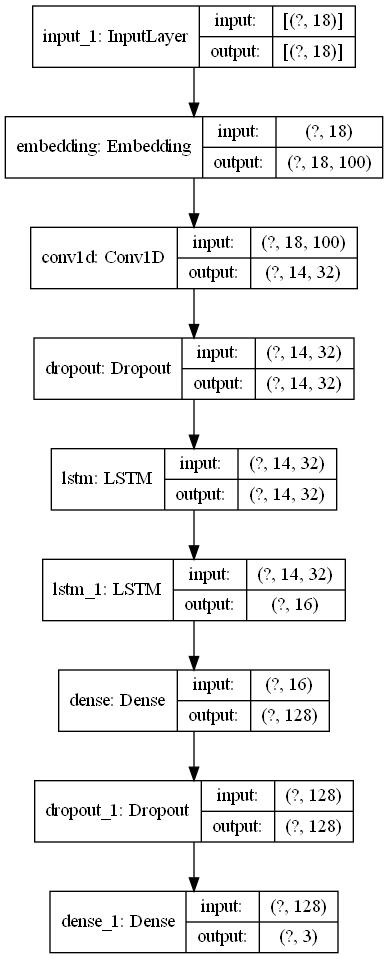

In [43]:
import graphviz
import pydot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [44]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy',
                              #tf.keras.metrics.Precision(),
                              #tf.keras.metrics.Recall(),
                              #tfa.metrics.F1Score(num_classes=27,
                                                  #average='weighted',
                                                 # threshold=0.5)])


In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy']) 
h=model.fit(X_train, Y_train ,validation_data=(X_val, Y_val),epochs=20, verbose=2)

Epoch 1/20
2071/2071 - 22s - loss: 0.3059 - accuracy: 0.9051 - val_loss: 0.2024 - val_accuracy: 0.9381
Epoch 2/20
2071/2071 - 22s - loss: 0.2191 - accuracy: 0.9355 - val_loss: 0.1887 - val_accuracy: 0.9408
Epoch 3/20
2071/2071 - 21s - loss: 0.2018 - accuracy: 0.9392 - val_loss: 0.1753 - val_accuracy: 0.9440
Epoch 4/20
2071/2071 - 22s - loss: 0.1882 - accuracy: 0.9426 - val_loss: 0.1674 - val_accuracy: 0.9479
Epoch 5/20
2071/2071 - 23s - loss: 0.1769 - accuracy: 0.9471 - val_loss: 0.1625 - val_accuracy: 0.9519
Epoch 6/20
2071/2071 - 22s - loss: 0.1709 - accuracy: 0.9495 - val_loss: 0.1549 - val_accuracy: 0.9541
Epoch 7/20
2071/2071 - 23s - loss: 0.1655 - accuracy: 0.9511 - val_loss: 0.1523 - val_accuracy: 0.9546
Epoch 8/20
2071/2071 - 23s - loss: 0.1626 - accuracy: 0.9515 - val_loss: 0.1500 - val_accuracy: 0.9549
Epoch 9/20
2071/2071 - 22s - loss: 0.1602 - accuracy: 0.9522 - val_loss: 0.1518 - val_accuracy: 0.9553
Epoch 10/20
2071/2071 - 22s - loss: 0.1582 - accuracy: 0.9530 - val_loss:

In [46]:
tr= pd.DataFrame({'acc': model.history.history['accuracy'], 'val_acc': model.history.history['val_accuracy'] })

los= pd.DataFrame({'train_loss': model.history.history['loss'], 'val_loss': model.history.history['val_loss'] })

<AxesSubplot:>

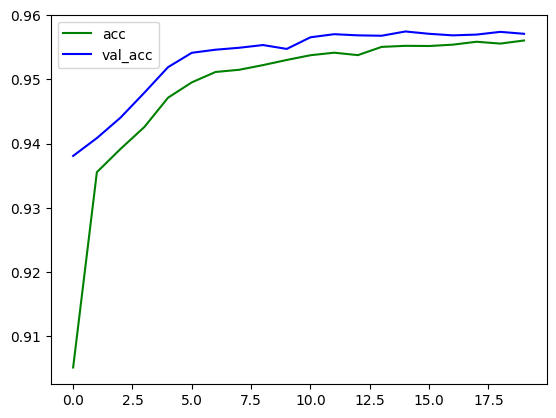

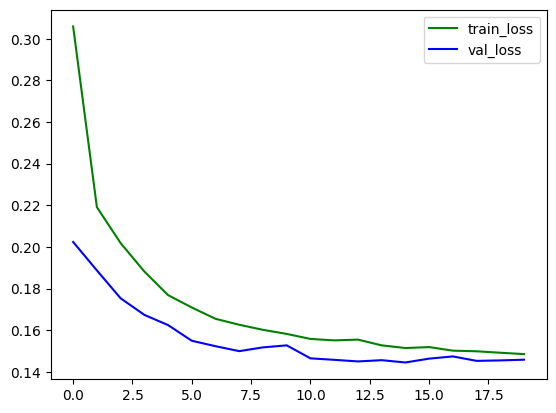

In [47]:


tr.plot(color={'acc': "green", 'val_acc': "blue"})


los.plot(color={'train_loss': "green", 'val_loss': "blue"})


In [54]:
def acc(y_true, y_pred):
    return np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred, axis=-1)).mean()

model.evaluate(X_val, Y_val)

predictions = model.predict(test_input)

print(acc(test_labels, predictions))

518/518 [==============================] - 1s 2ms/step - loss: 0.1492 - accuracy: 0.9550
0.9552368535419383


In [55]:
test_labels = np.argmax(test_labels, axis=-1)

predictions = np.argmax(predictions, axis=-1)




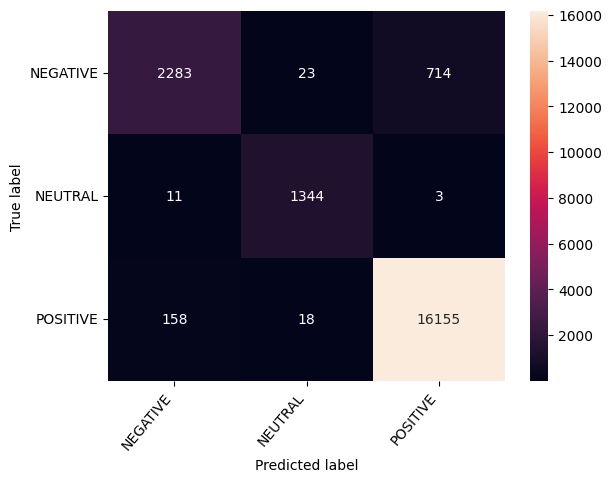

In [56]:
from sklearn.metrics import confusion_matrix
Y_train

kk

cm = confusion_matrix(y_true=test_labels, y_pred=predictions )
df_cm = pd.DataFrame(cm, index = [i for i in kk] , columns = [i for i in kk])
import seaborn as sns



hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=50, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      3020
           1       0.97      0.99      0.98      1358
           2       0.96      0.99      0.97     16331

    accuracy                           0.96     20709
   macro avg       0.95      0.91      0.93     20709
weighted avg       0.95      0.96      0.95     20709

              precision    recall  f1-score   support

    NEGATIVE       0.93      0.76      0.83      3020
     NEUTRAL       0.97      0.99      0.98      1358
    POSITIVE       0.96      0.99      0.97     16331

    accuracy                           0.96     20709
   macro avg       0.95      0.91      0.93     20709
weighted avg       0.95      0.96      0.95     20709



['loss', 'accuracy']

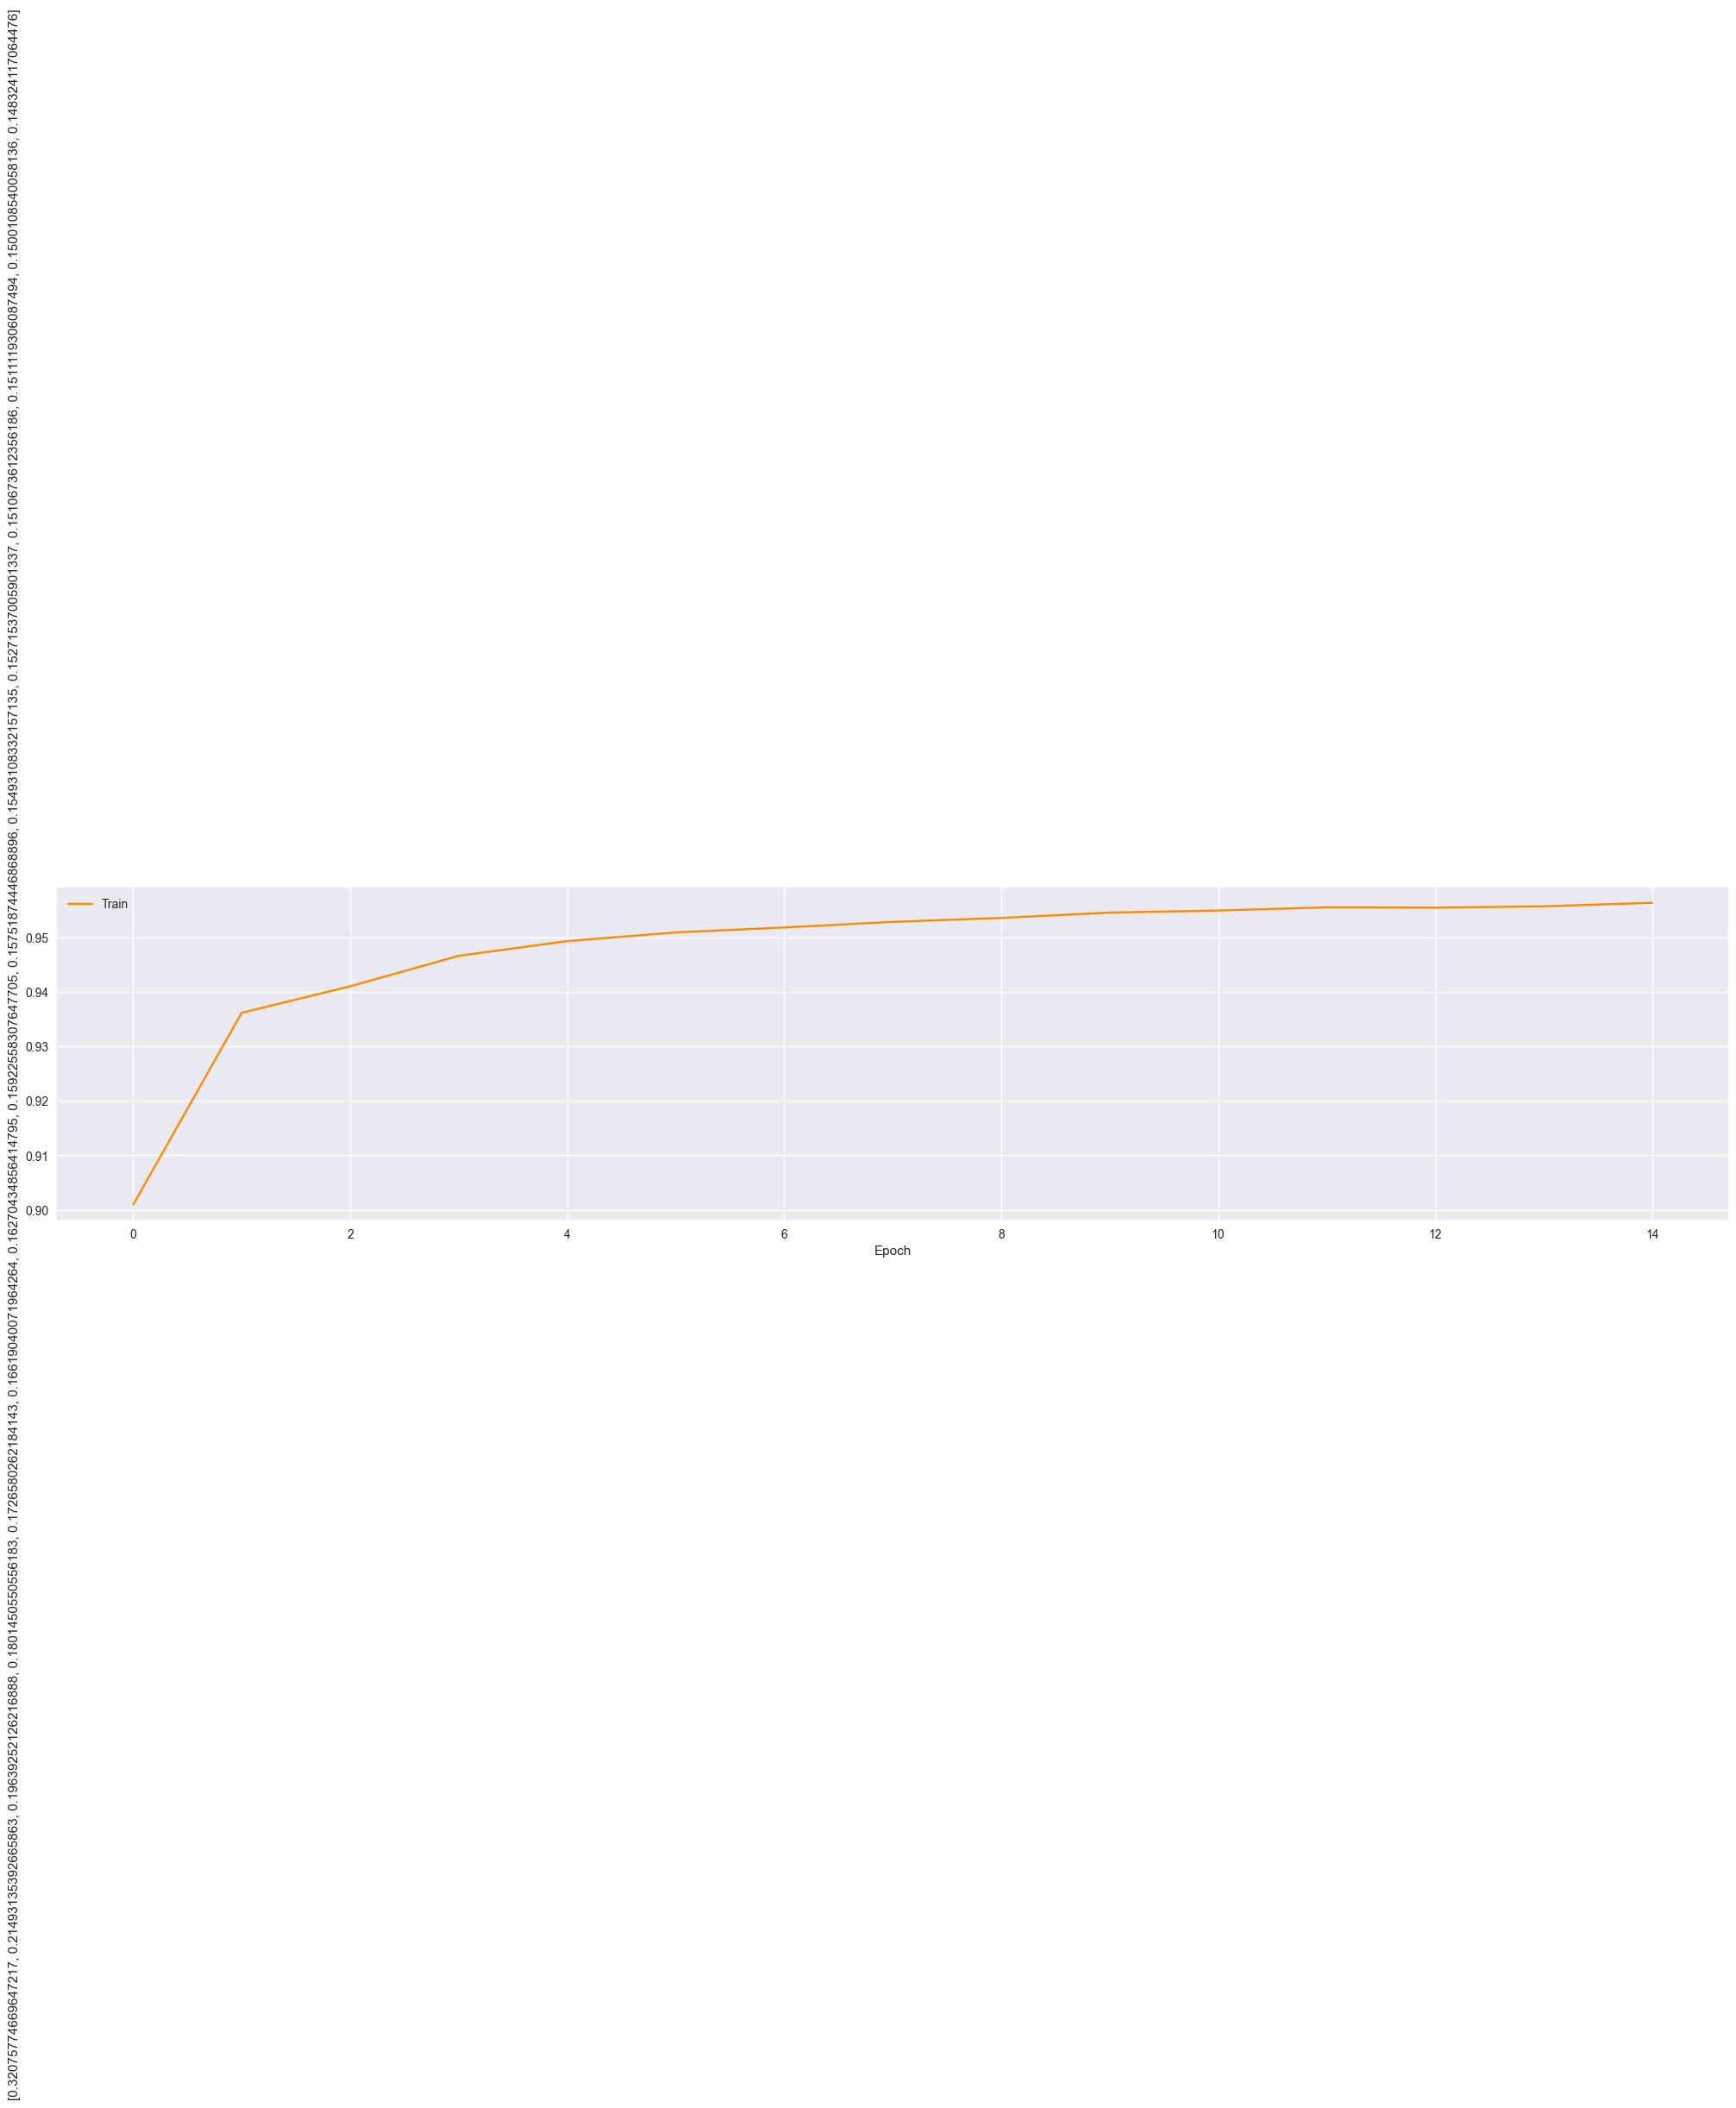

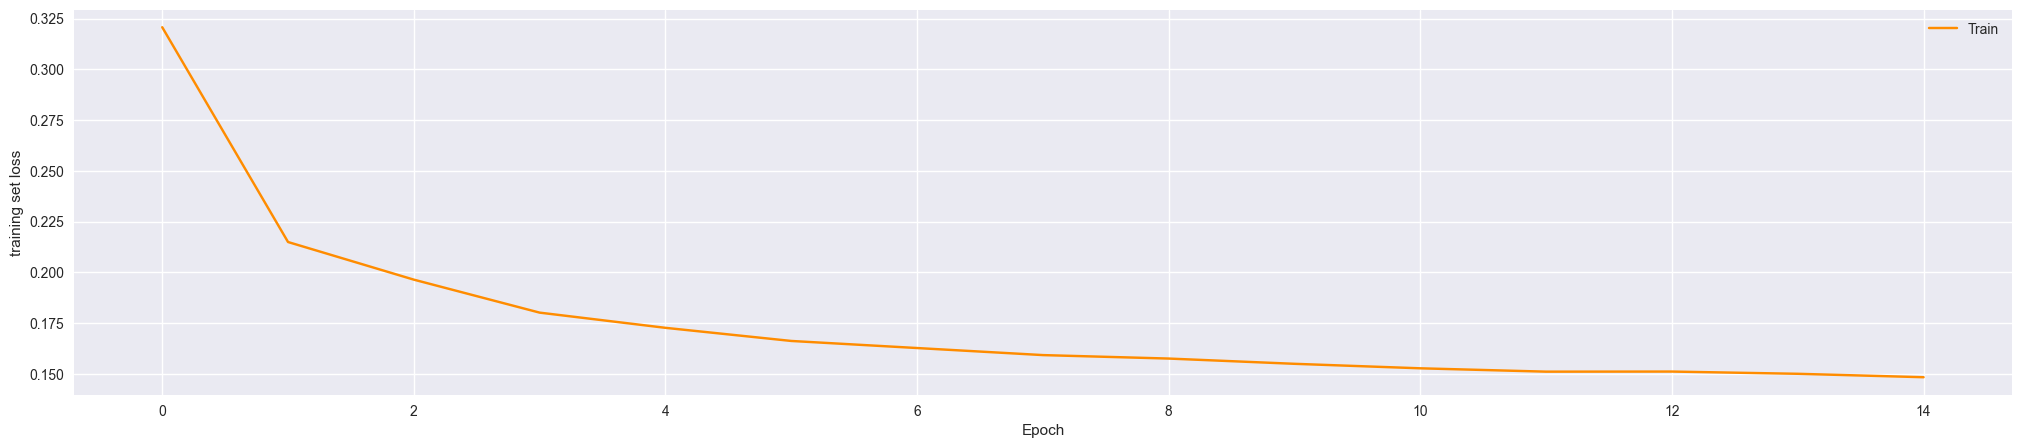

In [57]:

from sklearn import metrics
import tensorflow.keras
from sklearn.preprocessing import LabelBinarizer


print(metrics.classification_report(test_labels, predictions))

print(classification_report(test_labels, predictions, target_names=kk))

import matplotlib as mpl
def draw_plot(data, type_data):
  mpl.style.use('seaborn')
  plt.figure(figsize = (25, 5))
  plt.plot(data,'darkorange', label='Train')
  plt.xlabel('Epoch')
  plt.ylabel(type_data)
  plt.legend()

draw_plot(h.history['accuracy'],h.history['loss'] )

draw_plot(h.history['loss'],'training set loss' )

model.metrics_names

In [53]:
import random
import string
def generate_answer(query):
  texts = []
  pred_input = query
  pred_input = [letters.lower() for letters in pred_input if letters not in string.punctuation]
  pred_input = ''.join(pred_input)
  texts.append(pred_input)
  pred_input = tok.texts_to_sequences(texts)
  pred_input = np.array(pred_input).reshape(-1)
  pred_input = pad_sequences([pred_input],input_length)
  output = model.predict(pred_input)
  output = output.argmax()
  response_tag = label_transformer.inverse_transform([output])[0]
  return response_tag

In [60]:
generate_answer(" bad service")

'NEGATIVE'

In [57]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load('en-sentiment')

C:\Users\PC\anaconda3\envs\Mohamed\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [58]:
from tensorflow import keras
model.save('CNN2/model_LStm_15.hdf5',h)